# Space X Falcon 9 First Stage Landing Prediction

## Machine Learning - Classification

* Create a column for the class.
* Standardize the data.
* Split into training and testing data.
* Find the best Hyperparameter for SVM, Classification Trees and Logistic Regression.
* Find the method which performs best using test data.

### Import Libraries and Define Auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
X = pd.read_csv('dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
Y = data['Class'].to_numpy()
Y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Standardize the Data

In [5]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

### Train Test Split

We split the data into training and testing data using the function `train_test_split`. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function `GridSearchCV`.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [7]:
Y_test.shape

(18,)

### Logistic Regression

In [8]:
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver':['lbfgs']
              }

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [10]:
print('Tuned Hyperparameters:', logreg_cv.best_params_)
print('Accuracy:', logreg_cv.best_score_)

Tuned Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8214285714285714


In [11]:
logreg_cv_score = logreg_cv.score(X_test, Y_test)

In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

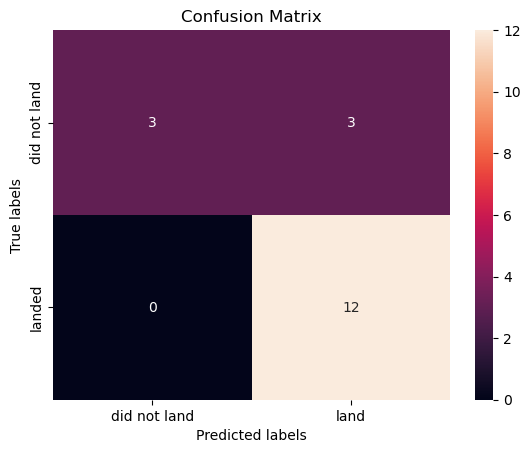

In [13]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.

### Support Vector Machines (SVM)

In [14]:
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)
              }

In [15]:
from sklearn.svm import SVC

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [16]:
print('Tuned Hyperparameters:', svm_cv.best_params_)
print('Accuracy:', svm_cv.best_score_)

Tuned Hyperparameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142858


In [17]:
svm_cv_score = svm_cv.score(X_test, Y_test)

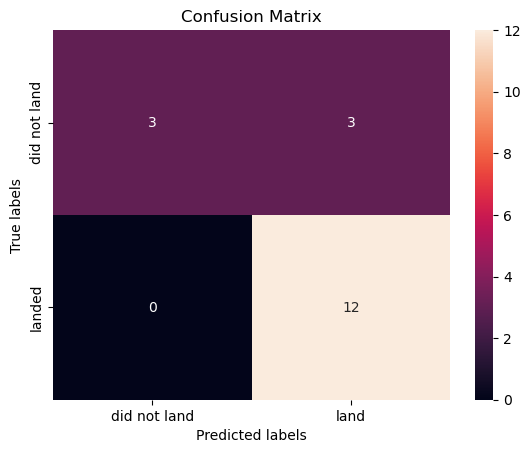

In [18]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### Decision Tree Classifier

In [19]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
}

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

c:\Users\Adars\miniconda3\envs\min_ds\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Adars\miniconda3\envs\min_ds\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Adars\miniconda3\envs\min_ds\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Adars\miniconda3\envs\min_ds\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [21]:
print("Tuned Hyperparameters:",tree_cv.best_params_)
print("Accuracy :",tree_cv.best_score_)

Tuned Hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy : 0.8571428571428571


In [22]:
tree_cv_score = tree_cv.score(X_test, Y_test)

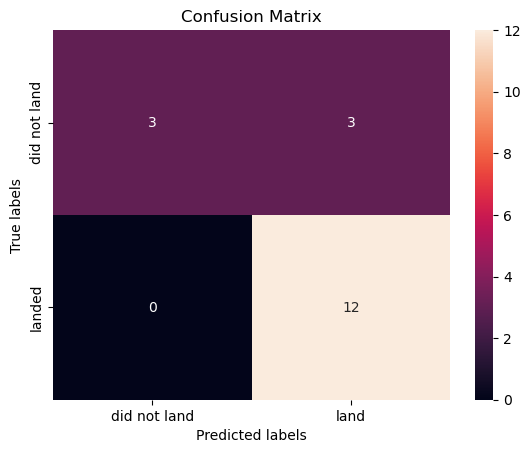

In [23]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### k Nearest Neighnors (kNN)

In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]
              }

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [26]:
print("Tuned Hyperparameters:", knn_cv.best_params_)
print("Accuracy :", knn_cv.best_score_)

Tuned Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Accuracy : 0.8339285714285714


In [27]:
knn_cv_score = knn_cv.score(X_test, Y_test)

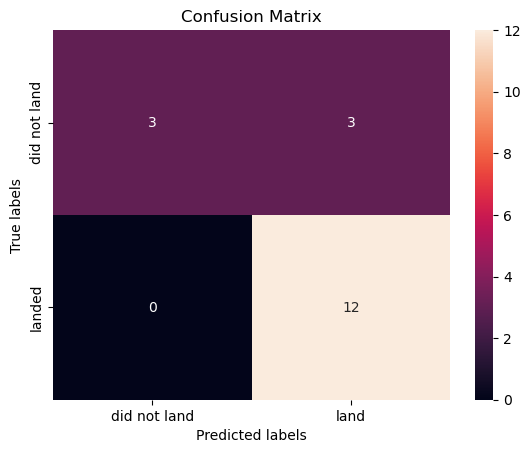

In [28]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [29]:
import pandas as pd

best_method_dict = {'Accuracy_Model': [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
                    'Score_Test': [logreg_cv_score, svm_cv_score, tree_cv_score, knn_cv_score]
                    }

best_method_df = pd.DataFrame(best_method_dict, index=['Logistic Regression', 'SVM', 'Decision Tree', 'kNN'])

In [30]:
best_method_df.head()

,Accuracy_Model,Score_Test
Logistic Regression,0.821429,0.833333
SVM,0.848214,0.833333
Decision Tree,0.857143,0.833333
kNN,0.833929,0.833333


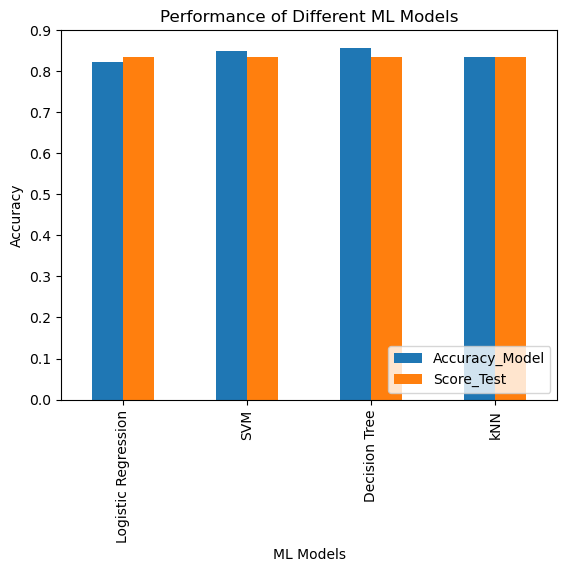

In [31]:
best_method_df.plot(kind='bar')
plt.title('Performance of Different ML Models')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

***